# 제작사&유통사 영향력과 가온지수 관계

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [R]
- image: images/gaon_logo.png

# 개요

코로나 발생으로 인해 예술 산업은 타격을 받았을까?

TOP 200 가온음악차트에서 시간에 따른 가온지수 총량 변화를 관찰해보자.

영화 산업은 또 어떠한가? 박스오피스 데이터에서 코로나 전후 매출액, 관객수 변화를 관찰해보자.

# 코로나 전후 가온지수 총량 변화

## imports

분석에 필요한 데이터 및 라이브러리를 가져온다.

가온 차트 데이터는 아래 링크에서 얻을 수 있다.

<http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL>

*참고로 크롤링 코드는 해당 파일에 포함하지 않았다.

In [23]:
if (!require(pacman)) install.packages('pacman')

library(pacman)
pacman::p_load("tidyverse", "stringr", "readxl", "xlsx", "repr")

# 필요한 파일을 불러온다.
gaon_month <- read.table('results/gaon_month.txt', header = TRUE)
gaon_week <- read.table('results/gaon_week.txt', header = TRUE)

In [24]:
# 가온지수가 존재하지 않는 행은 제거한다.
gaon_month_true <- gaon_month %>%
  drop_na(gaon_index)

gaon_week_true <- gaon_week %>%
  drop_na(gaon_index)

## 월별 차트 변화 관찰

In [25]:
df <- gaon_month_true %>%
        group_by(year_month) %>%
        summarise(sum = sum(gaon_index))

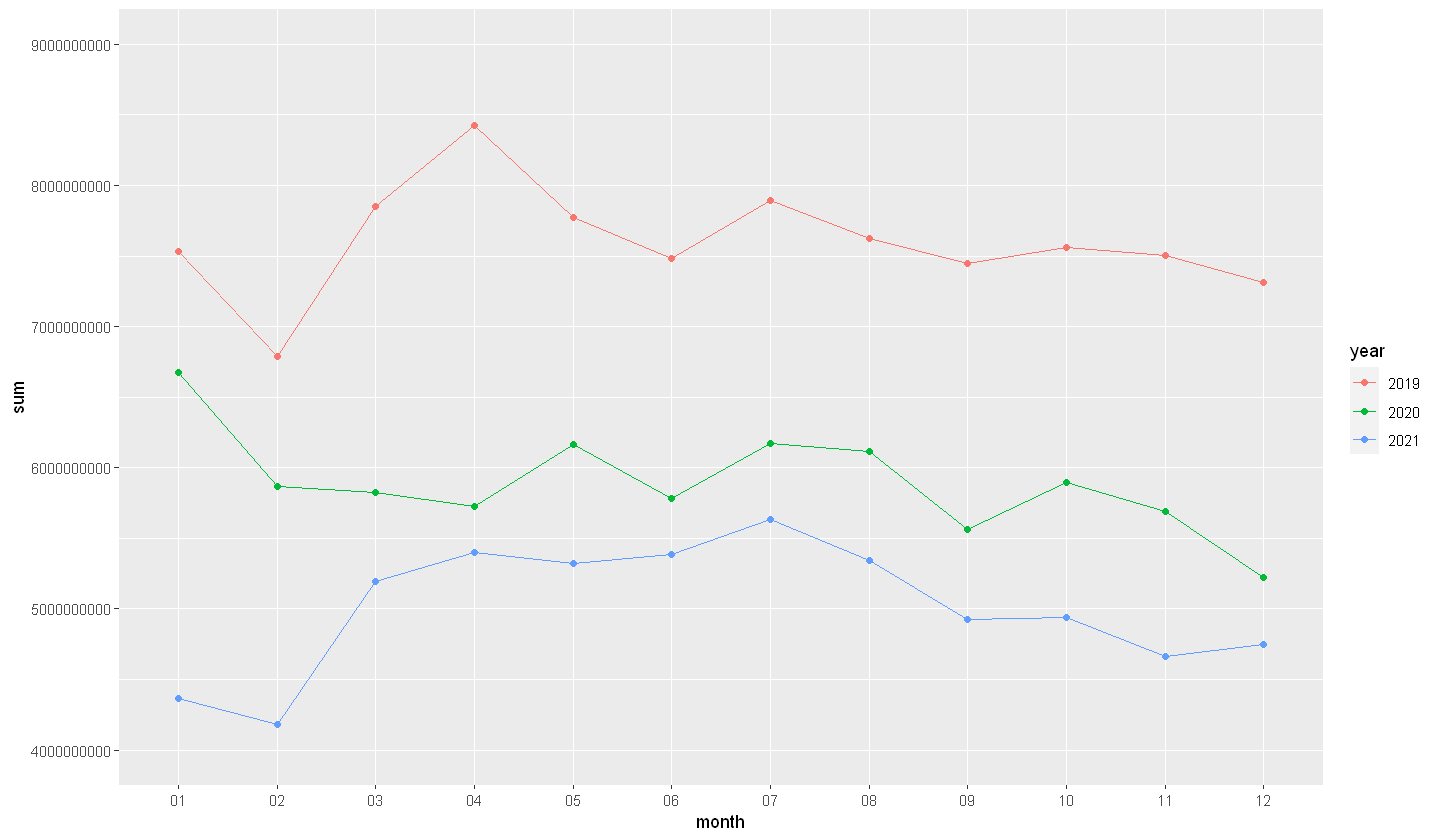

In [28]:
df_date_splited <- df %>% 
    mutate(year = str_sub(year_month, 1, 4), month = str_sub(year_month, 5, 6), .before = sum) %>%
    select(-year_month) 

options(repr.plot.width=12, repr.plot.height=7)
options(scipen=999)
df_date_splited %>%
    filter(2019 <= year, year <= 2021) %>%
    ggplot(aes(x = month, y = sum, group = year, color = year)) +
        geom_point() +
        geom_freqpoly(stat='identity') +
        ylim(4000000000, 9000000000)

위 그래프는 월별 가온지수 합계를 나타낸 것이다. (2019년 1월 가온지수 총합, 2019년 2월 가온지수 총합 $\dots$ 2021년 12월 가온지수 총합)

코로나 확산은 2020년 1월에 처음 발생하였으며 위 그래프에서 이를 기점으로 가온지수 합계가 크게 감소하였음을 볼 수 있다.

가온지수 합계의 하락 이후 2년간 코로나 이전 수준으로 회복되지 못하고 있다.

## 주별 차트 변화 관찰

Don't know how to automatically pick scale for object of type tukeysmooth. Defaulting to continuous.



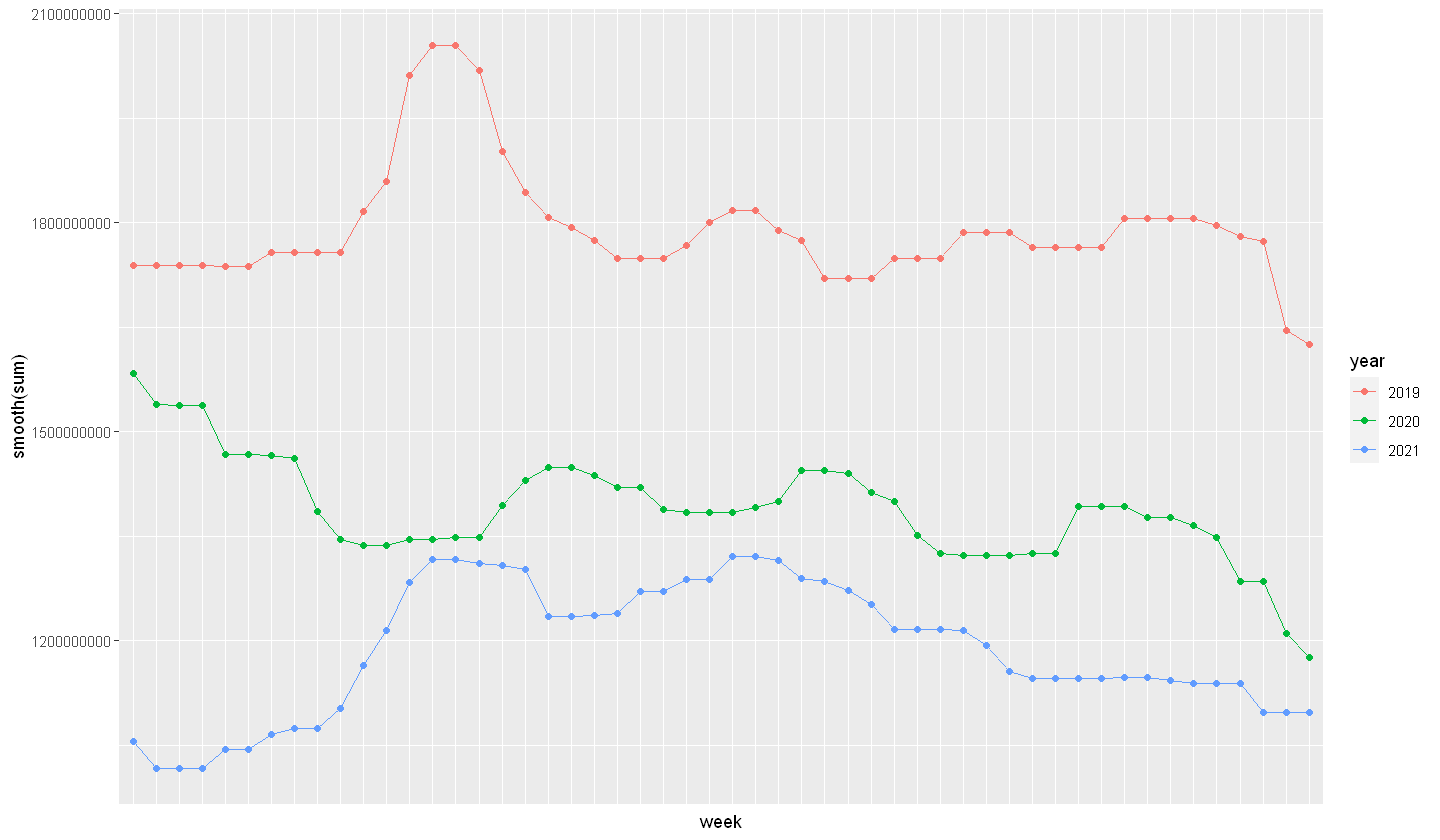

In [29]:
df <- gaon_week_true %>%
        group_by(year_week) %>%
        summarise(sum = sum(gaon_index))

df_date_splited <- df %>% 
    mutate(year = str_sub(year_week, 1, 4), week = str_sub(year_week, 5, 6), .before = sum) %>%
    select(-year_week) 

df_date_splited %>%
    filter(2019 <= year, year <= 2021) %>%
    ggplot(aes(x = week, y = smooth(sum), group = year, color = year)) +
        geom_point() +
        geom_freqpoly(stat='identity') +
        theme(axis.ticks.x = element_blank(),
              axis.text.x = element_blank())

위 그래프는 주별 가온지수 합계를 나타낸 것이다. (2019년 1주차 가온지수 총합, 2019년 2주차 가온지수 총합 $\dots$ 2021년 52주차 가온지수 총합)

주별 차트 변화도 월별 차트 변화와 유사한 양상을 보이고 있음을 알 수 있다.

# 코로나 전후 박스오피스 변화

## imports

분석에 필요한 데이터 및 라이브러리를 가져온다.

연도별 박스오피스 데이터는 KOBIS(<https://www.kobis.or.kr/kobis/business/stat/them/findYearlyTotalList.do>)에서 구할 수 있다.

In [32]:
years <- 2004:2021

box_office <- read.xlsx("results/box_office.xlsx", sheetIndex = 1, startRow = 5, colIndex = c(1,4,5)) %>%
                as_tibble() %>%
                slice(1:length(years))

colnames(box_office) <- c('연도', '매출액', '관객수')

## 연도별 매출액 변화 관찰

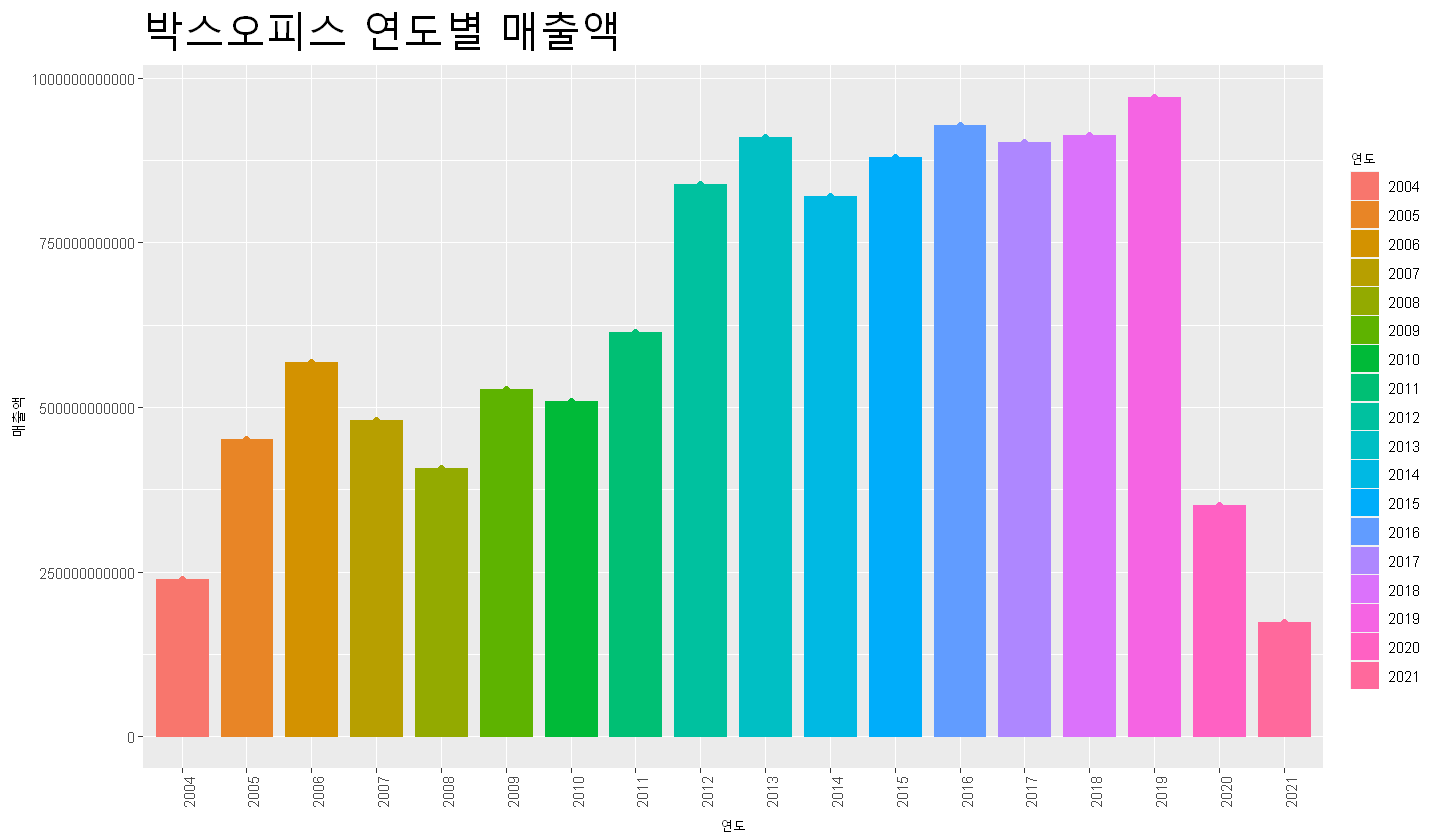

In [44]:
box_office %>%
    ggplot(aes(x = 연도, y = 매출액, group = 연도, color = 연도, fill = 연도)) +
        geom_point() +
        geom_bar(stat='identity', width = .8) + 
        ggtitle("박스오피스 연도별 매출액") + 
        theme(axis.text.x = element_text(angle = 90),
              plot.title=element_text(size = 30))

코로나가 확산되기 시작한 2020년부터 연도별 매출액이 매우 크게 감소하였음을 볼 수 있다.

2년간 회복되지 못하고 있다.

## 연도별 관객수 변화 관찰

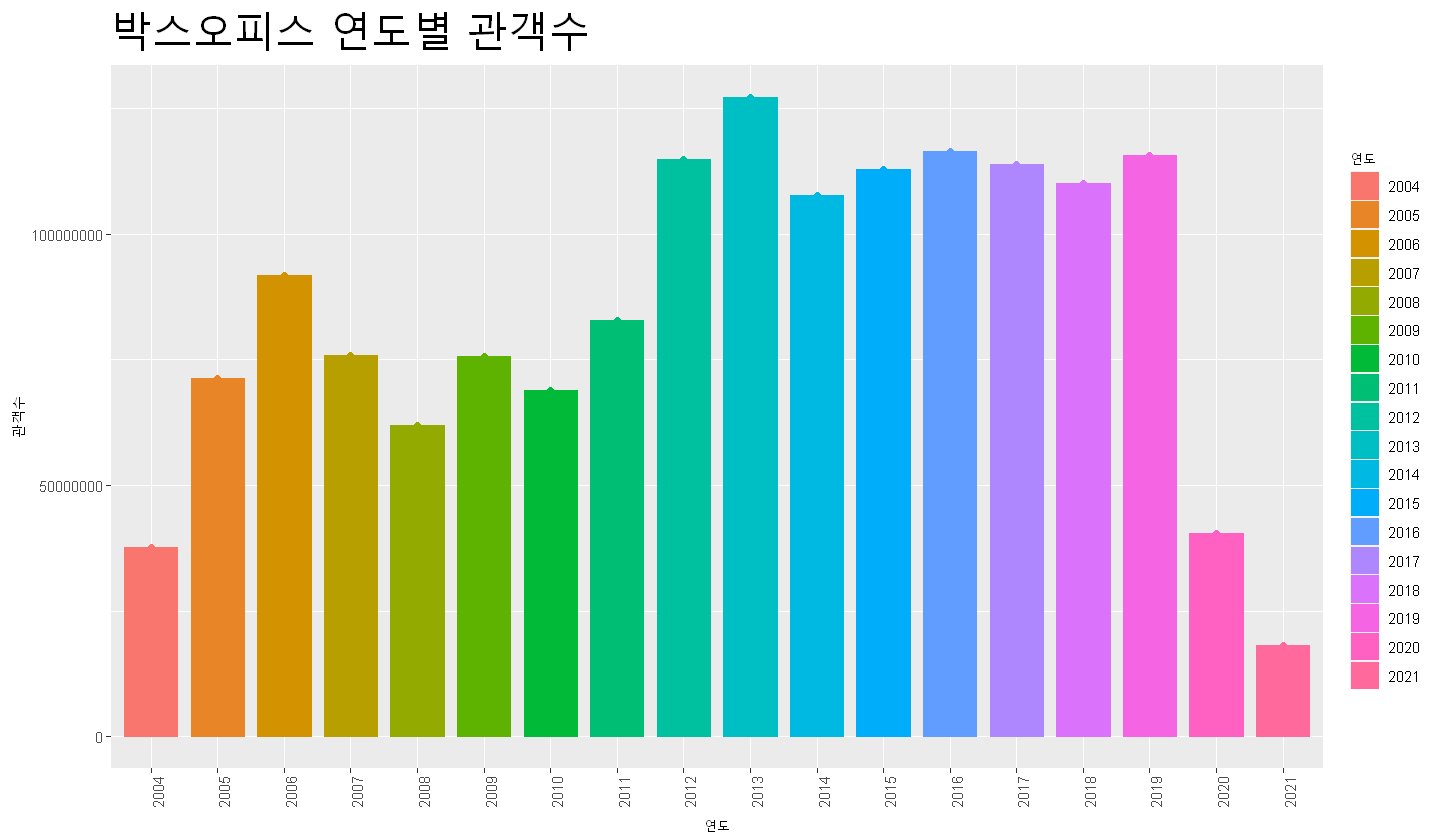

In [48]:
box_office %>%
    ggplot(aes(x = 연도, y = 관객수, group = 연도, color = 연도, fill = 연도)) +
        geom_point() +
        geom_bar(stat='identity', width = .8) + 
        ggtitle("박스오피스 연도별 관객수") +
        theme(axis.text.x = element_text(angle = 90),
              plot.title=element_text(size = 30)) 

연도별 매출액 변화와 유사하게 큰 감소를 보이고 있다.

## 요약

**결론적으로 음악 스트리밍 산업과 영화 산업은 코로나 확산 이후 크게 쇠퇴하였음을 확인하였다.**